## Explorty TTranscripts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with proper encoding for Arabic text
csv_file = './data/trainn.csv'
transcripts_df = pd.read_csv(csv_file, encoding='utf-8')

**Display the first few rows of the DataFrame**

In [2]:
transcripts_df.head(2)

,audio,transcript
0,train_sample_0,على إنها عار في الوقت اللي كانت بتتعامل مع أخو...
1,train_sample_1,فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيا...


**Display basic statistics of the DataFrame**

In [3]:
transcripts_df.describe().T

,count,unique,top,freq
audio,50709,50709,train_sample_0,1
transcript,50706,50652,خلاص,4


**Check for missing values**

In [4]:
transcripts_df.isnull().sum()

audio         0
transcript    3
dtype: int64

In [5]:
transcripts_df.dropna(subset=['transcript'], inplace=True)

**Character Distribution**

Unique Classes (Characters): [' ' 'ا' 'ل' 'ي' 'ه' 'ن' 'م' 'و' 'ت' 'ب' 'ع' 'ر' 'د' 'ك' 'ف' 'أ' 'س' 'ح'
 'ق' 'ش' 'إ' 'ج' 'ص' 'ط' 'خ' 'ى' 'ز' 'ض' 'غ' 'ذ' 'ث' 'ء' 'ظ' 'ئ' 'ؤ' 'آ']


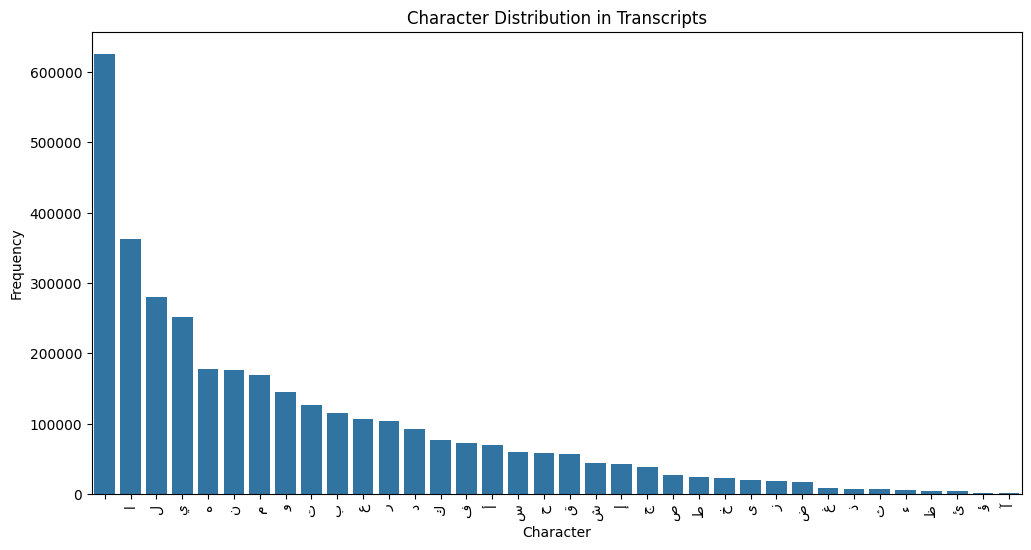

In [6]:
from collections import Counter

def character_distribution(transcripts):
    all_text = ''.join(transcripts)
    char_counter = Counter(all_text)
    return char_counter

# Calculate character distribution
char_counter = character_distribution(transcripts_df['transcript'].tolist())

# Convert the counter to a DataFrame for better visualization
char_df = pd.DataFrame(char_counter.items(), columns=['Character', 'Frequency']).sort_values(by='Frequency', ascending=False)

unique_classes = char_df['Character'].unique()
print(f"Unique Classes (Characters): {unique_classes}")

# Plot the character distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Character', y='Frequency', data=char_df)
plt.title('Character Distribution in Transcripts')
plt.xticks(rotation=90)
plt.show()

**Most Frequent Words**


Most Frequent Words:
    Word  Frequency
0     في      20250
1      و      16977
2    أنا      10798
3   يعني      10556
4     من       9746
5   اللي       9348
6     إن       7807
7     ده       7356
8    على       7186
9     هو       5975
10    مش       5714
11    ما       5476
12    إم       4599
13   إيه       4523
14    دي       4200
15    أه       4162
16   كده       4133
17   كان       3973
18    أو       3797
19  إحنا       3509


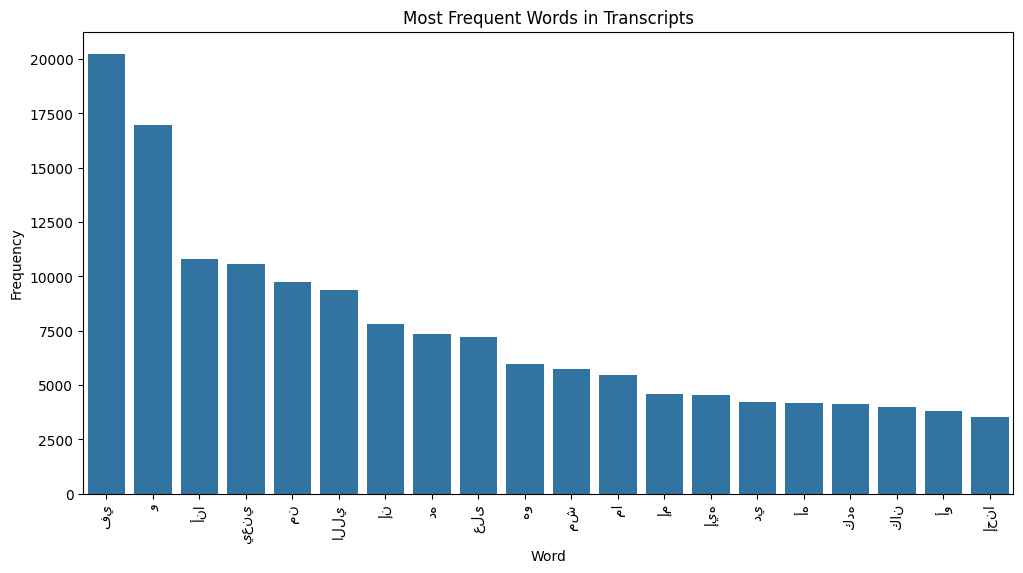

In [7]:
# Most Frequent Words
all_words = ' '.join(transcripts_df['transcript']).split()
word_counter = Counter(all_words)
most_common_words = word_counter.most_common(20)  # Top 20 most frequent words

# Convert the counter to a DataFrame for better visualization
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("\nMost Frequent Words:")
print(most_common_words_df)

# Plot most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=most_common_words_df)
plt.title('Most Frequent Words in Transcripts')
plt.xticks(rotation=90)
plt.show()


**Word Count Distribution**

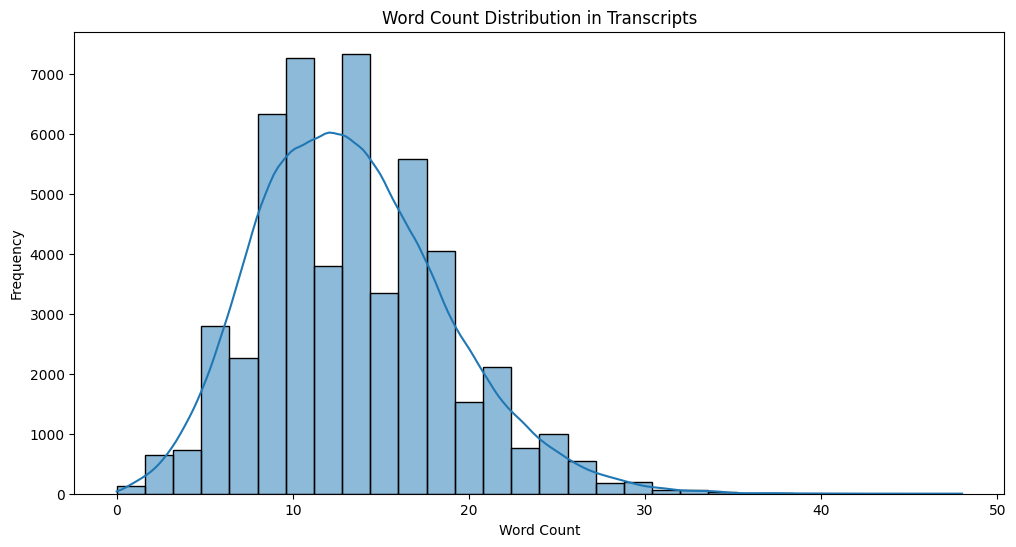

In [8]:
def word_count_distribution(transcripts):
    word_counts = [len(transcript.split()) for transcript in transcripts]
    return word_counts

# Calculate word count distribution
word_counts = word_count_distribution(transcripts_df['transcript'].tolist())

# Plot the word count distribution
plt.figure(figsize=(12, 6))
sns.histplot(word_counts, bins=30, kde=True)
plt.title('Word Count Distribution in Transcripts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


**Transcript Length Analysis**

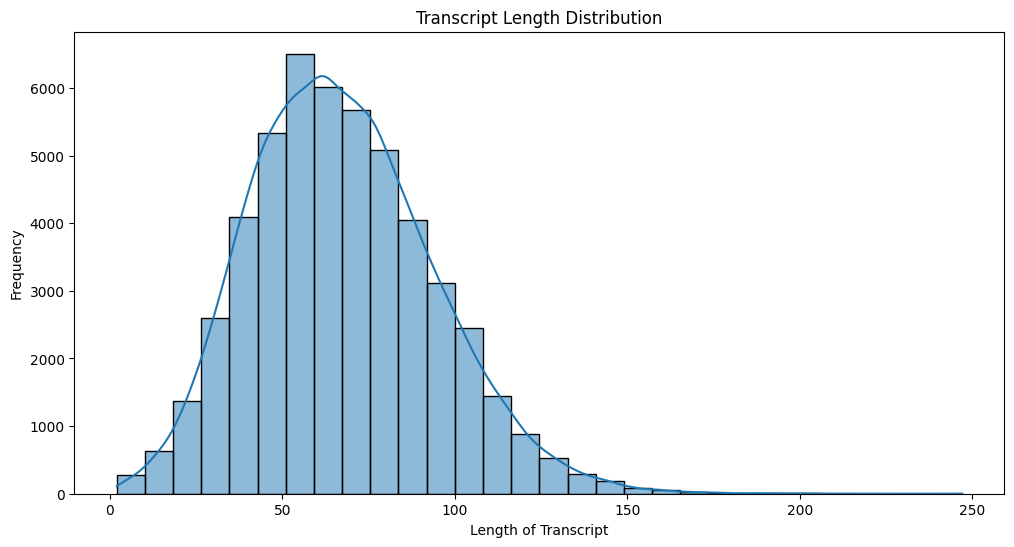

In [17]:
def transcript_length_distribution(transcripts):
    lengths = [len(transcript) for transcript in transcripts]
    return lengths

# Calculate transcript length distribution
transcript_lengths = transcript_length_distribution(transcripts_df['transcript'].tolist())

# Plot the transcript length distribution
plt.figure(figsize=(12, 6))
sns.histplot(transcript_lengths, bins=30, kde=True)
plt.title('Transcript Length Distribution')
plt.xlabel('Length of Transcript')
plt.ylabel('Frequency')
plt.show()


# transciptes Cleaning

In [1]:
import pandas as pd
import re

class TextTransform:
    """Maps characters to integers and vice versa."""
    def __init__(self):
        char_map_str = """
        ' 0
        <SPACE> 1
        ا 2
        ب 3
        ت 4
        ث 5
        ج 6
        ح 7
        خ 8
        د 9
        ذ 10
        ر 11
        ز 12
        س 13
        ش 14
        ص 15
        ض 16
        ط 17
        ظ 18
        ع 19
        غ 20
        ف 21
        ق 22
        ك 23
        ل 24
        م 25
        ن 26
        ه 27
        و 28
        ي 29
        ء 30
        آ 31
        أ 32
        ؤ 33
        إ 34
        ئ 35
        ى 36
        """
        self.char_map = {}
        self.index_map = {}
        for line in char_map_str.strip().split('\n'):
            ch, index = line.split()
            self.char_map[ch] = int(index)
            self.index_map[int(index)] = ch
        self.index_map[1] = ' '  # Map <SPACE> to space character

    def text_to_int(self, text):
        """Converts text to an integer sequence using a character map."""
        int_sequence = []
        for c in text:
            if c == ' ':
                int_sequence.append(self.char_map['<SPACE>'])
            elif c in self.char_map:
                int_sequence.append(self.char_map[c])
            else:
                # Handle unknown characters (optional)
                int_sequence.append(0)  # Or another token for unknown characters
        return int_sequence

    def int_to_text(self, labels):
        """Converts integer labels to a text sequence using a character map."""
        return ''.join([self.index_map[i] for i in labels]).replace('<SPACE>', ' ')

def preprocess_arabic_transcripts(csv_file, output_file):
    text_transform = TextTransform()

    def find_non_arabic(text):
        non_arabic_pattern = re.compile(r'[^\u0600-\u06FF\s]')
        non_arabic_characters = ''.join(set(re.findall(non_arabic_pattern, text)))
        return non_arabic_characters

    def replace_characters_of_interest(text):
        replacements = {
            'ٱ': 'ا',
            'چ': 'ج',
            'ڨ': 'ف',
            'ة' :'ه'
        }
        for old_char, new_char in replacements.items():
            text = text.replace(old_char, new_char)
        return text

    # Load the CSV file with proper encoding for Arabic text
    transcripts_df = pd.read_csv(csv_file, encoding='utf-8')

    # Check for NaN values in transcript column and remove corresponding rows
    nan_rows = transcripts_df[pd.isna(transcripts_df['transcript'])].index.tolist()
    removed_rows = []  # To store indices of removed rows

    for idx in nan_rows:
        if idx < len(transcripts_df):
            removed_rows.append(idx)
            print(f"Removed row '{transcripts_df.iloc[idx]['audio']}' due to NaN transcript")

    # Drop rows with NaN transcripts
    transcripts_df.dropna(subset=['transcript'], inplace=True)

    # Drop duplicate transcripts
    transcripts_df.drop_duplicates(subset=['transcript'], inplace=True)

    # Re-index the DataFrame
    transcripts_df.reset_index(drop=True, inplace=True)

    for idx, row in transcripts_df.iterrows():
        transcript = row['transcript']

        # Replace characters of interest
        transcript = replace_characters_of_interest(transcript)

        # Find non-Arabic characters (if needed)
        # non_arabic_characters = find_non_arabic(transcript)

        # Remove any unwanted characters not in the TextTransform
        cleaned_transcript = ''.join([c for c in transcript if c in text_transform.char_map or c == ' '])

        # Example of converting transcript to integer sequence
        int_sequence = text_transform.text_to_int(cleaned_transcript)

        # Replace original transcript with cleaned version
        transcripts_df.at[idx, 'transcript'] = cleaned_transcript

    # Save the final edited DataFrame to a new CSV file
    transcripts_df.to_csv(output_file, index=False, encoding='utf-8')

    print(f"Indices of rows with NaN transcripts: {removed_rows}")

    # Print a sample of 5 encoded transcripts and decode them back
    sample_transcripts = transcripts_df['transcript'].head(5)
    for idx, transcript in enumerate(sample_transcripts):
        int_sequence = text_transform.text_to_int(transcript)
        decoded_text = text_transform.int_to_text(int_sequence)
        print(f"\nSample {idx + 1}:")
        print(f"Original Transcript: {transcript}")
        print(f"Encoded: {int_sequence}")
        print(f"Decoded: {decoded_text}")

    return transcripts_df

In [2]:

if __name__ == "__main__":
    csv_file = r"./data/train.csv"
    output_file = r"./data/ttrain.csv"
    df=pd.read_csv(csv_file)
    cleaned_df = preprocess_arabic_transcripts(csv_file, output_file)

Indices of rows with NaN transcripts: []

Sample 1:
Original Transcript: على إنها عار في الوقت اللي كانت بتتعامل مع أخويا الولد الوحيد معامله خاصه
Encoded: [19, 24, 36, 1, 34, 26, 27, 2, 1, 19, 2, 11, 1, 21, 29, 1, 2, 24, 28, 22, 4, 1, 2, 24, 24, 29, 1, 23, 2, 26, 4, 1, 3, 4, 4, 19, 2, 25, 24, 1, 25, 19, 1, 32, 8, 28, 29, 2, 1, 2, 24, 28, 24, 9, 1, 2, 24, 28, 7, 29, 9, 1, 25, 19, 2, 25, 24, 27, 1, 8, 2, 15, 27]
Decoded: على إنها عار في الوقت اللي كانت بتتعامل مع أخويا الولد الوحيد معامله خاصه

Sample 2:
Original Transcript: فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيارات معينه إم وشايف إن دول الأنسب لمنتخب مصر في الفتره
Encoded: [21, 32, 23, 29, 9, 1, 11, 3, 26, 2, 1, 19, 28, 16, 27, 25, 1, 8, 29, 11, 1, 27, 28, 1, 2, 24, 11, 2, 6, 24, 1, 3, 29, 3, 22, 36, 1, 24, 29, 27, 1, 34, 8, 4, 29, 2, 11, 2, 4, 1, 25, 19, 29, 26, 27, 1, 34, 25, 1, 28, 14, 2, 29, 21, 1, 34, 26, 1, 9, 28, 24, 1, 2, 24, 32, 26, 13, 3, 1, 24, 25, 26, 4, 8, 3, 1, 25, 15, 11, 1, 21, 29, 1, 2, 24, 21, 4, 11, 27]
Decod